# Install and import necessary libraries

In [1]:
pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 425.1 kB/s eta 0:00:00


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio as ls
from scipy.optimize import curve_fit
import seaborn as sb
from ipywidgets import interact, FloatSlider

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Boss Hogg Data

In [4]:
bh = ls.read('/content/drive/MyDrive/Boss Hog BP01_LAS_RT_10-9_8950-18221.las').df()

In [ ]:
bh.describe()

,TVD,ROPA,AGRCC-T,DGRCC,GMGRCC-T,RM24P-T,RM48P-T,RM48A-T,CM48P-T,R15P,...,R39A,C39P,ARH16P-T,ARM48P-T,ARM48A-T,ACM48P-T,XBC1-T,DENSMUDINAVG,PWTA-T,PWEA
count,9272.000000,9267.000000,3108.000000,4986.000000,962.000000,3070.000000,3058.00000,3070.000000,1.00,5012.000000,...,5012.000000,5001.000000,955.000000,955.000000,955.000000,955.000000,4908.000000,9268.000000,7535.000000,9005.000000
mean,13546.678695,75.175744,86.167429,92.895947,75.343235,0.622544,0.62777,0.661485,3276.34,2.627444,...,0.706442,3384.895896,0.480287,0.476970,0.477638,2294.540621,139.598498,16.762942,208.287336,17.250405
std,2674.359473,27.990536,7.263263,7.987769,8.416644,0.172701,0.17726,0.191171,NaN,56.669973,...,8.610607,586.624488,0.179167,0.232819,0.185638,527.183834,10.214339,1.092824,25.636013,1.158592
min,8924.130000,0.290000,47.650000,47.825200,40.996700,0.350000,0.35000,0.370000,3276.34,0.188800,...,0.204600,4.060000,0.292000,0.285500,0.315700,285.259400,103.440000,14.500000,148.330000,14.742100
25%,11230.000000,60.910000,82.750000,88.495600,71.075550,0.510000,0.52000,0.550000,3276.34,0.262800,...,0.275600,2998.802200,0.372250,0.367450,0.382000,1928.367550,130.635000,16.000000,189.865000,16.361000
50%,13546.110000,79.490000,88.025000,93.848650,77.319350,0.580000,0.58000,0.610000,3276.34,0.299100,...,0.305100,3359.591100,0.454900,0.447200,0.464100,2245.946800,142.750000,17.100000,207.500000,17.713600
75%,15863.390000,95.595000,90.825000,98.441525,81.773000,0.680000,0.68000,0.700000,3276.34,0.336950,...,0.334825,3790.988000,0.532300,0.522700,0.524600,2733.571150,147.800000,17.600000,228.740000,18.133300
max,18176.300000,658.310000,101.880000,115.730300,91.561600,1.250000,1.60000,1.900000,3276.34,1788.010500,...,200.000000,5489.894500,2.372800,3.861900,2.750800,3519.437700,168.810000,18.300000,255.200000,18.796200


# Function for generating well log plots

In [5]:
def plot_logs(df,logs, depth, units, c=None, GR_lim = None, ylim_lower = 0, ylim_upper = 20000):

  """
  Plots the logs for a given depth
  logs is a list of logs to plot

  df: The dataframe
  logs: Pass the logs to be plotted in a list
  depth: Pass the depth reference, e.g. TVD, MD, TVDSS, etc.
  c: Optional: Specify color for each log
  units: Specify units for each log, e.g. '(OHMM)', '(API)', etc.
  GR_lim: optional
  """

  # Default colors if not provided
  default_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
  if c is None:
    c = default_colors[:len(logs)]

  #Handle default value for GR range
  if GR_lim is None:
    GR_lim = [0,120]

  fig, ax = plt.subplots(nrows=1, ncols = len(logs), figsize=(2.5*len(logs),6))
  for i in range(len(logs)):
    ax[i].plot(df[logs[i]], df[depth], c = c[i])

    ax[i].set_ylim(ylim_lower,ylim_upper)

    ax[i].set_xlabel(logs[i] + " " + str(units[i]), fontweight = 'bold', fontsize=13)
    ax[0].set_ylabel('True Vertical Depth, TVD (ft)', fontweight = 'bold', fontsize=13)

    if units[i] == '(OHMM)':
      ax[i].set_xscale('log')
      ax[i].set_xlim(0.01,np.max(df[logs[i]])+20)

    # elif units[i] == '(API)':
    #   ax[i].set_xlim(GR_lim[0],GR_lim[1])

    else:
      ax[i].set_xlim(df[logs[i]].quantile(0.01), df[logs[i]].quantile(0.99))
      # ax[i].set_xlim(np.min(df[logs[i]]),np.max(df[logs[i]]))


    ax[i].invert_yaxis()

    plt.tight_layout()

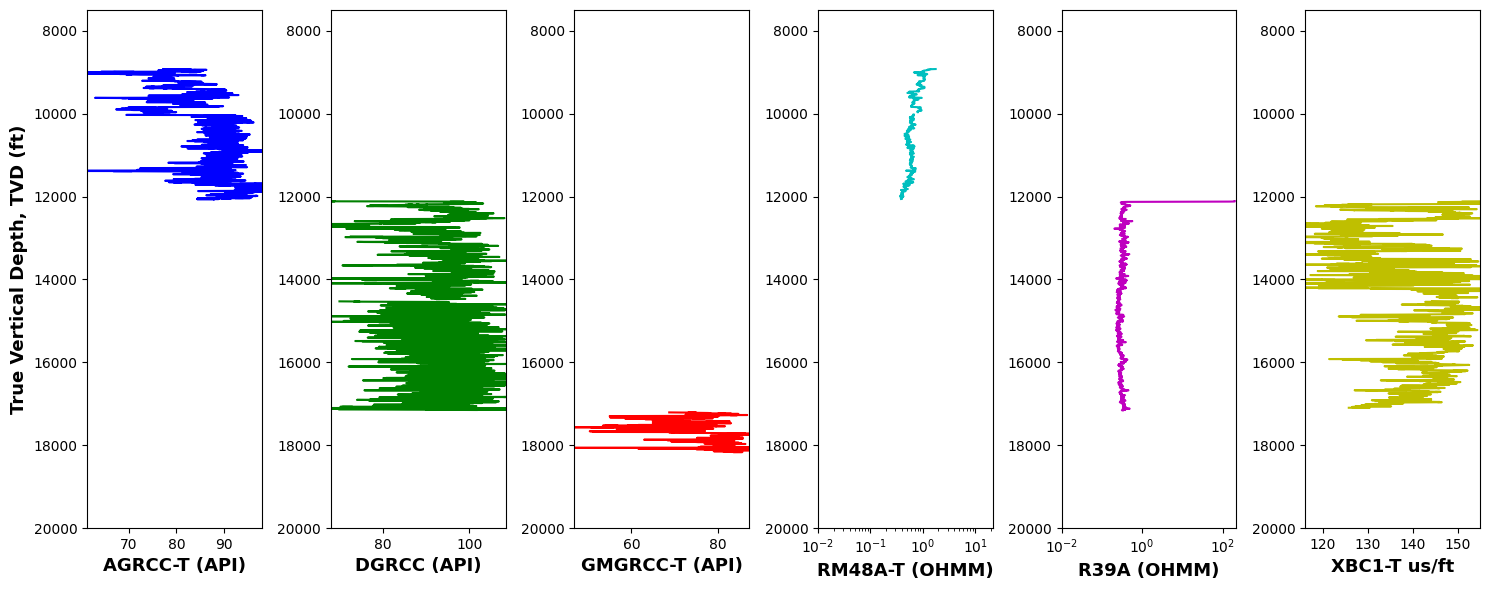

In [ ]:
plot_logs(bh, logs=['AGRCC-T','DGRCC', 'GMGRCC-T', 'RM48A-T', 'R39A', 'XBC1-T'], depth='TVD', units=['(API)', '(API)', '(API)', '(OHMM)', '(OHMM)', 'us/ft'], ylim_lower=7500)

1. From the visualization above, we need to combine AGRCC-T, DGRCC, and GMGRCC-T so we have a complete Gamma Ray log.

2. Combine RM48A-T and R39A

# Load Shell well data

In [6]:
sh_orig = ls.read('/content/drive/MyDrive/EI 281 Shell - 17710410510000.las').df()
sh_orig['DEPTH'] = sh_orig.index

In [38]:
sh2 = pd.read_excel('/content/drive/MyDrive/basic_logs.xlsx')

In [7]:
sh_orig.columns

Index(['CILD', 'DT', 'GR:1', 'ILD', 'ILM', 'SFLA', 'SP', 'CALI', 'DPHI',
       'GR:2', 'RHOB', 'DEPTH'],
      dtype='object')

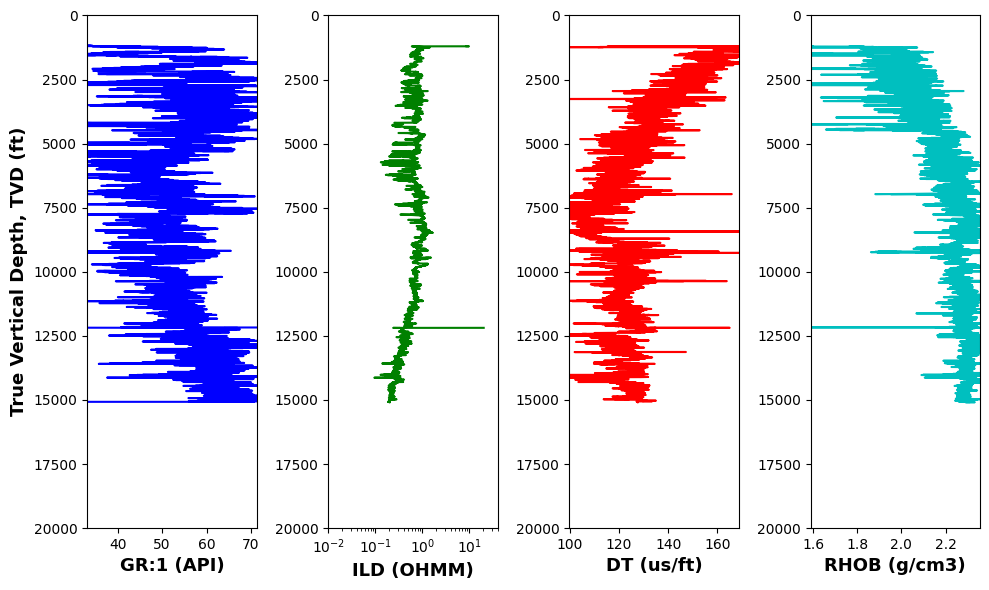

In [8]:
plot_logs(sh_orig, logs=['GR:1', 'ILD', 'DT','RHOB'], depth='DEPTH', units=['(API)', '(OHMM)', '(us/ft)', '(g/cm3)'])

# Compute Shallow function for RHOB

In [10]:
# Function to compute the shallow RHOB
# Fitted to power law eq. to the original RHOB data we have and used the eq. to compute the missing shallow RHOB
def power_rhob(depth,a,b,c):
  return a*(depth**b)

In [11]:
#Create a new dataframe and drop the null values using RHOB as the subset
sh_orig_filt = sh_orig.dropna(subset=['RHOB'])

In [12]:
# Fit the defined power eq.
popt, pcov = curve_fit(power_rhob, sh_orig_filt['DEPTH'], sh_orig_filt['RHOB'])

In [15]:
popt #optimized parameters

array([1.05134279, 0.08339661, 1.        ])

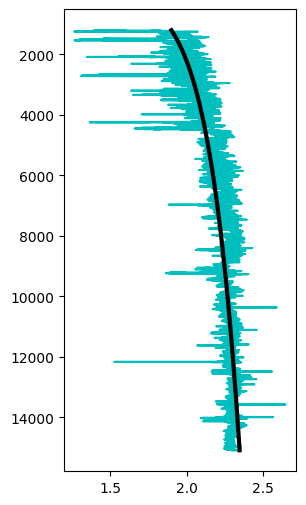

In [17]:
# Plot the original data with the fitted eq.
fig, ax = plt.subplots(figsize=(3,6))
plt.plot(sh_orig_filt['RHOB'], sh_orig_filt['DEPTH'], c = 'c')
plt.plot(power_rhob(sh_orig_filt['DEPTH'], *popt), sh_orig_filt['DEPTH'], c = 'k', linewidth=3)

ax.invert_yaxis()

# Extend Depth up to 0

The depth reference doesn't start from 0. It is important to have the data starting from 0 reference for the overburden computation

In [18]:
new_depths = np.arange(0, sh_orig['DEPTH'].min(), 0.5)

# Create a new dataframe with the new depth range; other columns will be filled with NaN
new_data = pd.DataFrame({
    'DEPTH': new_depths
})

# Set other columns initally to NaN
for col in sh_orig.columns:
    if col != 'DEPTH':
        new_data[col] = np.nan

# Concatenate the new dataframe with the existing dataframe
sh_extended = pd.concat([new_data, sh_orig])

# Sort the resulting dataframe by depth to maintain the order
sh_extended = sh_extended.sort_values(by='DEPTH').reset_index(drop=True)

sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972


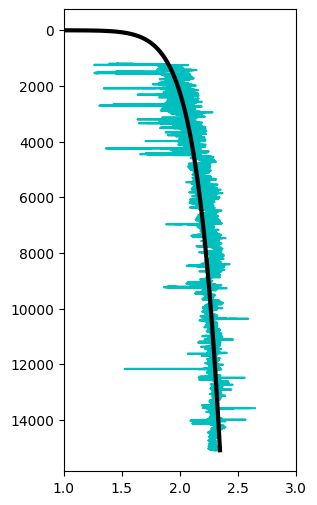

In [20]:
# Visualize the extended the original density with the fitting function for the extended shallow function
fig, ax = plt.subplots(figsize=(3,6))
plt.plot(sh_extended['RHOB'], sh_extended['DEPTH'], c = 'c')
plt.plot(power_rhob(sh_extended['DEPTH'], *popt), sh_extended['DEPTH'], c = 'k', linewidth=3)

plt.xlim(1,3)

ax.invert_yaxis()

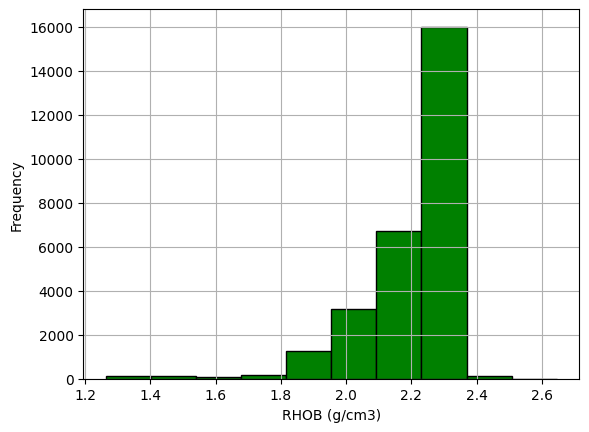

In [24]:
# Check the density distribution to spot possible outliers
sh_extended['RHOB'].hist(color = 'g', edgecolor='k')

plt.xlabel('RHOB (g/cm3)')
plt.ylabel('Frequency');

In [25]:
# Restrict RHOB to 1.8 <= RHBO <= 2.4
sh_extended['RHOB'] = [rhob if rhob >= 1.8 and rhob <= 2.4 else np.nan for rhob in sh_extended['RHOB']]

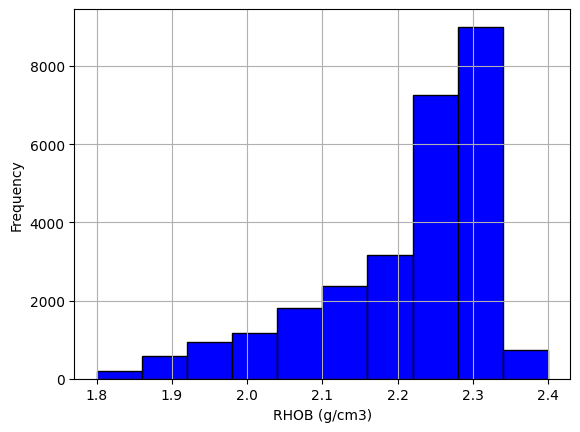

In [26]:
# Check the NEW density distribution
sh_extended['RHOB'].hist(color = 'b', edgecolor='k')

plt.xlabel('RHOB (g/cm3)')
plt.ylabel('Frequency');

In [27]:
#  Create a new RHOB to compute the shallow section and other missing values that were initially removed for being an outlier
sh_extended['RHOB_comp'] = [power_rhob(depth,*popt) if pd.isna(den) else den for depth,den in zip(sh_extended['DEPTH'], sh_extended['RHOB'])]

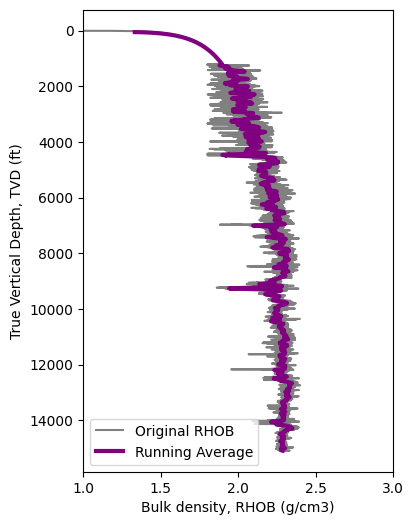

In [36]:
fig, ax = plt.subplots(figsize=(4,6))
plt.plot(sh_extended['RHOB_comp'], sh_extended['DEPTH'], c = 'gray', label = 'Original RHOB')
plt.plot(sh_extended['RHOB_comp'].rolling(100).mean(), sh_extended['DEPTH'], c = 'purple', linewidth=3, label = 'Running Average')
# plt.plot(power_rhob(sh_extended['DEPTH'], *popt), sh_extended['DEPTH'], c = 'r', linewidth=3)

plt.xlim(1,3)

ax.invert_yaxis()

plt.xlabel('Bulk density, RHOB (g/cm3)')
plt.ylabel('True Vertical Depth, TVD (ft)')
plt.legend()

In [39]:
sh2.columns

Index(['DEPTH', 'TVDSS', 'GR_MUD', 'ILD_MUD', 'DT_MUD', 'DT_MUD_MA',
       'SEIS_VELOCITY', 'SP', 'RHOB', 'DPHI', 'CALI', 'UH_PSI', 'UH_PPG',
       'SV_PSI', 'SV_PPG', 'MW'],
      dtype='object')

In [40]:
# Extract the TVDSS data from sh2. For Sv computation
sh_extended['TVDSS'] = None
for i in range(len(sh_extended)):
  sh_extended['TVDSS'][i] = sh2['TVDSS'][i]

In [41]:
sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992292,0.5
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051343,1.0
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087501,1.5
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113908,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,15088.0
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,15088.5
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,15089.0
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,15089.5


In [42]:
#TVDSS doesn't appear correct. The well isn't completely vertical. Let's load the well survey
sh_survey = pd.read_csv('/content/drive/MyDrive/Shell 281 well_dir survey export.txt', sep='\t')

In [43]:
sh_survey.columns

Index(['UWI', 'Country Name', 'Well Name', 'Well Num', 'Survey ID',
       'Measured Depth', 'TV Depth', 'Deviation Angle', 'Deviation Azimuth',
       'Deviation N/S', 'N/S', 'Deviation E/W', 'E/W',
       'PRODFit Formation Code', 'PRODFit Formation Name', 'Point Type Code',
       'Point Type Name'],
      dtype='object')

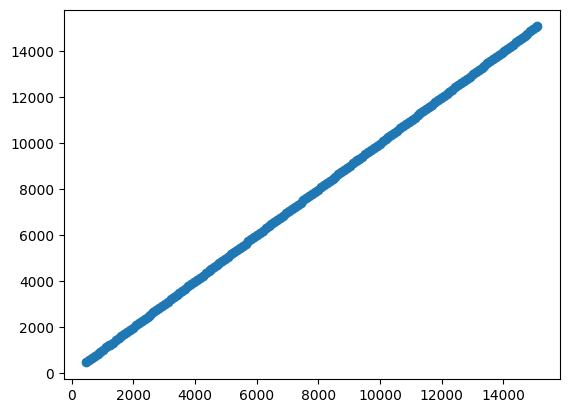

In [44]:
plt.scatter(sh_survey['Measured Depth'], sh_survey['TV Depth'])

<Axes: >

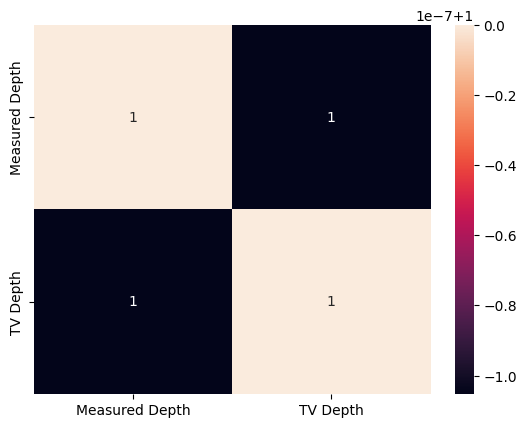

In [45]:
import seaborn as sb
sb.heatmap(sh_survey[['Measured Depth', 'TV Depth']].corr(), annot=True)

In [46]:
from scipy.stats import pearsonr
pearsonr(sh_survey['Measured Depth'], sh_survey['TV Depth'])

PearsonRResult(statistic=0.9999998946746504, pvalue=0.0)

In [47]:
from scipy.stats import linregress
md_tvd = linregress(sh_survey['Measured Depth'], sh_survey['TV Depth'])

In [48]:
md_tvd

LinregressResult(slope=0.9991279678650159, intercept=3.5851157755505483, rvalue=0.9999998946746506, pvalue=0.0, stderr=3.648161526996434e-05, intercept_stderr=0.3233133482608127)

In [49]:
sh_survey['diff'] = sh_survey['Measured Depth'] - sh_survey['TV Depth']

In [50]:
len(sh_survey)

160

In [51]:
# Use the relationship between MD and TVD obtained from the survey df to calculate the TVD for sh_extended
sh_extended['TVD'] = sh_extended['DEPTH'] * md_tvd.slope + md_tvd.intercept

In [52]:
#MD == TVD up to 7200 ft. At that depth, the well started getting deviated. So the TVD column will be slightly modified, specifically, the regression will be used to predict from 7200 ft.
for i in range(len(sh_extended)):
  if sh_extended[ 'DEPTH'][i] <=7200:
    sh_extended['TVD'][i] = sh_extended['DEPTH'][i]
  else:
    sh_extended['TVD'][i] = sh_extended['DEPTH'][i] * md_tvd.slope + md_tvd.intercept


In [53]:
sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992292,0.5,0.500000
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051343,1.0,1.000000
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087501,1.5,1.500000
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113908,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,15088.0,15078.427895
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,15088.5,15078.927459
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,15089.0,15079.427023
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,15089.5,15079.926587


# Calculate Hydrostatic and Overburden stress

In [54]:
hydro_grad = 0.465 #Typical hydrostatic gradient reported for Gulf of Mexico
sh_extended['hydrostatic'] = [hydro_grad*tvd for tvd in sh_extended['TVD']] #Create a new column and compute the hydrostatic pressure; pressure due to a column of water above a reference depth

In [55]:
sh_extended['TVDSS'] = sh_extended['TVD'] - 83 #Create TVDSS from TVD by subracting the Kelly Bushing elevation from the TVD
sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD,hydrostatic
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-83.000000,0.000000,0.000000
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992292,-82.500000,0.500000,0.232500
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051343,-82.000000,1.000000,0.465000
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087501,-81.500000,1.500000,0.697500
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113908,-81.000000,2.000000,0.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,14995.427895,15078.427895,7011.468971
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,14995.927459,15078.927459,7011.701268
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,14996.427023,15079.427023,7011.933566
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,14996.926587,15079.926587,7012.165863


In [56]:
sh_extended['overburden'] = None
# sh_extended['overburden'] = [0 if depth <=83 else None for depth in sh_extended['TVDSS']]
# sh_extended['hydrostatic'] = [0 if depth <=83 else hydro for depth,hydro in zip(sh_extended['TVDSS'], sh_extended['hydrostatic'])]

In [57]:
sh_extended['overburden'] = [hydro if depth <=283 else overb for depth,hydro,overb in zip(sh_extended['DEPTH'], sh_extended['hydrostatic'], sh_extended['overburden'])]
sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD,hydrostatic,overburden
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-83.000000,0.000000,0.000000,0.0000
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992292,-82.500000,0.500000,0.232500,0.2325
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051343,-82.000000,1.000000,0.465000,0.4650
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087501,-81.500000,1.500000,0.697500,0.6975
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113908,-81.000000,2.000000,0.930000,0.9300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,14995.427895,15078.427895,7011.468971,NaN
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,14995.927459,15078.927459,7011.701268,NaN
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,14996.427023,15079.427023,7011.933566,NaN
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,14996.926587,15079.926587,7012.165863,NaN


In [58]:
sh_overb = sh_extended.loc[sh_extended['DEPTH'] >283] #Extract data beneath the seafloor, i.e., > 283 ft

In [59]:
g = 9.81 # acceleration due to gravity, m/s2
sh_overb['TVD_m'] = sh_overb['TVD']*0.3048  # To ensure consistency in units. Set TVD to meters. Overburden will be computed in MPa and converted to psi
sh_overb['overburden'].iloc[0] = (sh_overb['RHOB_comp'].iloc[0]*1000*g*sh_overb['TVD_m'].iloc[0]*1e-6)*145 #Density converted to Kg/m3; First index calculated without having to average the density

In [60]:
sh_overb

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD,hydrostatic,overburden,TVD_m
567,283.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683755,200.500000,283.500000,131.827500,206.958847,86.410800
568,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684003,201.000000,284.000000,132.060000,NaN,86.563200
569,284.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684250,201.500000,284.500000,132.292500,NaN,86.715600
570,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684496,202.000000,285.000000,132.525000,NaN,86.868000
571,285.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684743,202.500000,285.500000,132.757500,NaN,87.020400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,14995.427895,15078.427895,7011.468971,NaN,4595.904822
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,14995.927459,15078.927459,7011.701268,NaN,4596.057089
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,14996.427023,15079.427023,7011.933566,NaN,4596.209357
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,14996.926587,15079.926587,7012.165863,NaN,4596.361624


**To compute subsequent overburden after the first index, we use this equation:**

sv = ((rhob[i] - rhob[i-1])/2) \* g * (((TVD[i] - TVD[i-1])))

In [61]:
for i in range(1,len(sh_overb)):
  sh_overb['overburden'].iloc[i] = ((((sh_overb['RHOB_comp'].iloc[i] + sh_overb['RHOB_comp'].iloc[i-1])/2)*1000*g*(sh_overb['TVD_m'].iloc[i] - sh_overb['TVD_m'].iloc[i-1])*1e-6)*145) + (sh_overb['overburden'].iloc[i-1])

In [62]:
sh_overb

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD,hydrostatic,overburden,TVD_m
567,283.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683755,200.500000,283.500000,131.827500,206.958847,86.410800
568,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684003,201.000000,284.000000,132.060000,207.323880,86.563200
569,284.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684250,201.500000,284.500000,132.292500,207.688967,86.715600
570,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684496,202.000000,285.000000,132.525000,208.054108,86.868000
571,285.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.684743,202.500000,285.500000,132.757500,208.419302,87.020400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,14995.427895,15078.427895,7011.468971,14214.553887,4595.904822
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,14995.927459,15078.927459,7011.701268,14215.058353,4596.057089
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,14996.427023,15079.427023,7011.933566,14215.560576,4596.209357
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,14996.926587,15079.926587,7012.165863,14216.059702,4596.361624


Add the computed overburden startinf from the seafloor to the initial dataframe, sh_extended.

**NOTE:** *Above the seafloor, the hydrostatic pressure is equal to the overburden stress*

In [63]:
sh_extended['overburden'][567:] = sh_overb['overburden']

In [64]:
#Initialize the uh and sv above the sea level to rig floor to NaN
sh_extended['hydrostatic'][:166] = np.nan
sh_extended['overburden'][:166] = np.nan

In [65]:
sh_extended

,DEPTH,CILD,DT,GR:1,ILD,ILM,SFLA,SP,CALI,DPHI,GR:2,RHOB,RHOB_comp,TVDSS,TVD,hydrostatic,overburden
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-83.000000,0.000000,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992292,-82.500000,0.500000,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.051343,-82.000000,1.000000,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087501,-81.500000,1.500000,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.113908,-81.000000,2.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6452,NaN,NaN,2.3324,2.332400,14995.427895,15078.427895,7011.468971,14214.553887
30177,15088.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7346,NaN,NaN,2.3258,2.325800,14995.927459,15078.927459,7011.701268,14215.058353
30178,15089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7302,NaN,NaN,2.3117,2.311700,14996.427023,15079.427023,7011.933566,14215.560576
30179,15089.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8734,NaN,NaN,2.2972,2.297200,14996.926587,15079.926587,7012.165863,14216.059702


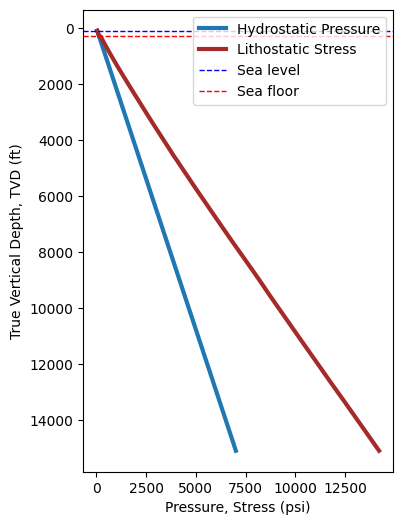

In [66]:
fig,ax = plt.subplots(figsize=(4,6))
plt.plot(sh_extended['hydrostatic'], sh_extended['TVD'], linewidth=3, label = 'Hydrostatic Pressure')
plt.plot(sh_extended['overburden'], sh_extended['TVD'], linewidth=3, c = 'brown', label = 'Lithostatic Stress')

ax.axhline(y=83, color='b', linestyle='--', linewidth=1, label = 'Sea level')
ax.axhline(y=283, color='r', linestyle='--', linewidth=1, label = 'Sea floor')

ax.invert_yaxis()

plt.xlabel('Pressure, Stress (psi)')
plt.ylabel('True Vertical Depth, TVD (ft)')
plt.legend()

In [105]:
#Calc. the effective stress
sh_extended['eff_stress'] = sh_extended['overburden'] - sh_extended['hydrostatic']

In [ ]:
sh_extended.columns

Index(['DEPTH', 'CILD', 'DT', 'GR:1', 'ILD', 'ILM', 'SFLA', 'SP', 'CALI',
       'DPHI', 'GR:2', 'RHOB', 'RHOB_comp', 'TVDSS', 'TVD', 'hydrostatic',
       'overburden', 'GR_filt'],
      dtype='object')

# Clean Logs

- Check distribution and remove possible outliers. This is done essentially for the Gamma Ray, Resistivity, and sonic transit time logs.

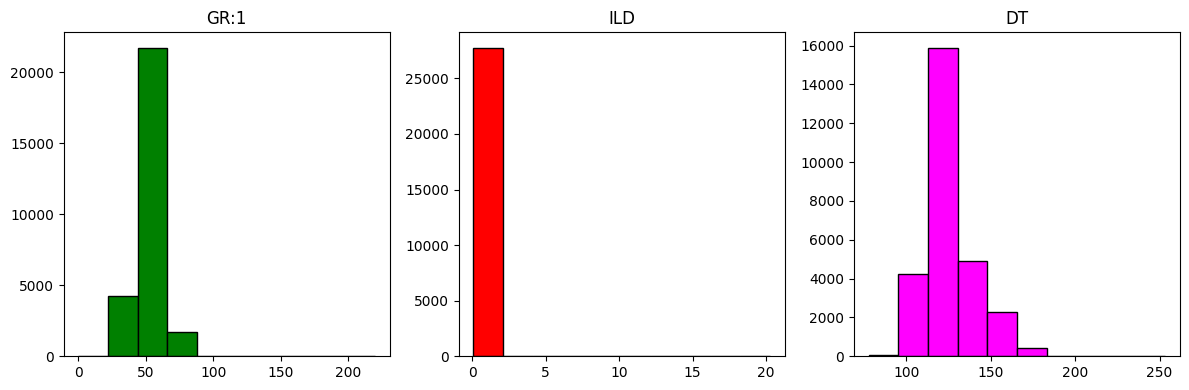

In [80]:
logs_to_clean = ['GR:1', 'ILD', 'DT']
c = ['g', 'r', 'magenta']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(4*3,4))
for i in range(len(logs_to_clean)):
    ax[i].hist(sh_extended[logs_to_clean[i]], bins=10, color = c[i], edgecolor='k')
    ax[i].set_title(logs_to_clean[i])
plt.tight_layout()

In [81]:
sh_extended['GR_filt'] = [gr if gr <= 90 else np.nan for gr in sh_extended['GR:1']]
sh_extended['ILD_filt'] = [res if res < 2 else np.nan for res in sh_extended['ILD']]

# The sonic transit time need to be systematically cleaned. Specifically considering the depth range together with a specific cut-off

sh_extended['DT_filt'] = None
[dt if dt >=90 and dt <= 180 else np.nan for dt in sh_extended['DT']]

for i in range(len(sh_extended)):
  if sh_extended['TVD'][i] <= 9000:
    if sh_extended['DT'][i] >= 90 and sh_extended['DT'][i] <= 180:
      sh_extended['DT_filt'][i] = sh_extended['DT'][i]
    else:
      sh_extended['DT_filt'][i] = np.nan
  else:
    if sh_extended['DT'][i] >= 90 and sh_extended['DT'][i] <= 150:
      sh_extended['DT_filt'][i] = sh_extended['DT'][i]
    else:
      sh_extended['DT_filt'][i] = np.nan

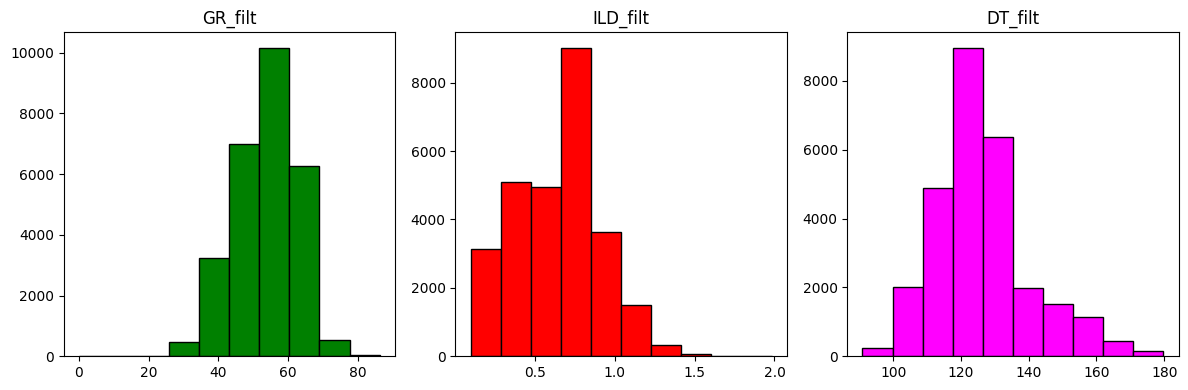

In [82]:
logs_to_clean_filt = ['GR_filt', 'ILD_filt', 'DT_filt']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(4*3,4))
for i in range(len(logs_to_clean_filt)):
    ax[i].hist(sh_extended[logs_to_clean_filt[i]], bins=10, color = c[i], edgecolor='k')
    ax[i].set_title(logs_to_clean_filt[i])
plt.tight_layout()

In addition to removing outliers, I took the moving average of the logs and plotted that to compare with the original logs.

**NOTE:** *How you clean the logs is dependent on the problems at hand, your domain expertise in workign with well logs, and project goal.*

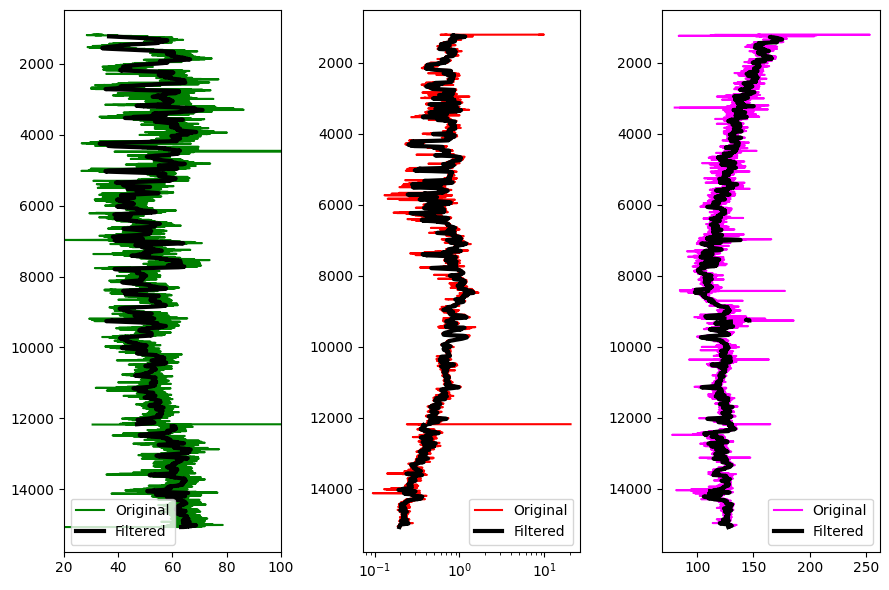

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(3*3,6))
ax[0].plot(sh_extended['GR:1'], sh_extended['TVD'], c = 'g', label = 'Original')
# ax[0].plot(sh_extended['GR_filt'], sh_extended['TVD'], c = 'g')
ax[0].plot(sh_extended['GR_filt'].rolling(100).mean(), sh_extended['TVD'], c = 'k', linewidth=3, label = 'Filtered')

ax[1].plot(sh_extended['ILD'], sh_extended['TVD'], c = 'r', label = 'Original')
# ax[1].plot(sh_extended['ILD_filt'], sh_extended['TVD'], c = 'r')
ax[1].plot(sh_extended['ILD_filt'].rolling(50).mean(), sh_extended['TVD'], c = 'k', linewidth=3, label = 'Filtered')

ax[2].plot(sh_extended['DT'], sh_extended['TVD'], c = 'magenta', label = 'Original')
# ax[2].plot(sh_extended['DT_filt'], sh_extended['TVD'], c = 'magenta')
ax[2].plot(sh_extended['DT_filt'].rolling(50).mean(), sh_extended['TVD'], c = 'k', linewidth=3, label = 'Filtered')



ax[0].set_xlim(20,100)

ax[1].set_xscale('log')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()

Create a new columns to implement the rolling average as the final filetered log for GR, RES, and DT.

In [85]:
sh_extended['GR_filtered'] = sh_extended['GR_filt'].rolling(100).mean()
sh_extended['ILD_filtered'] = sh_extended['ILD_filt'].rolling(50).mean()
sh_extended['DT_filtered'] = sh_extended['DT_filt'].rolling(50).mean()

# Filter Mud

- Set a cut off value for shale based on GR response

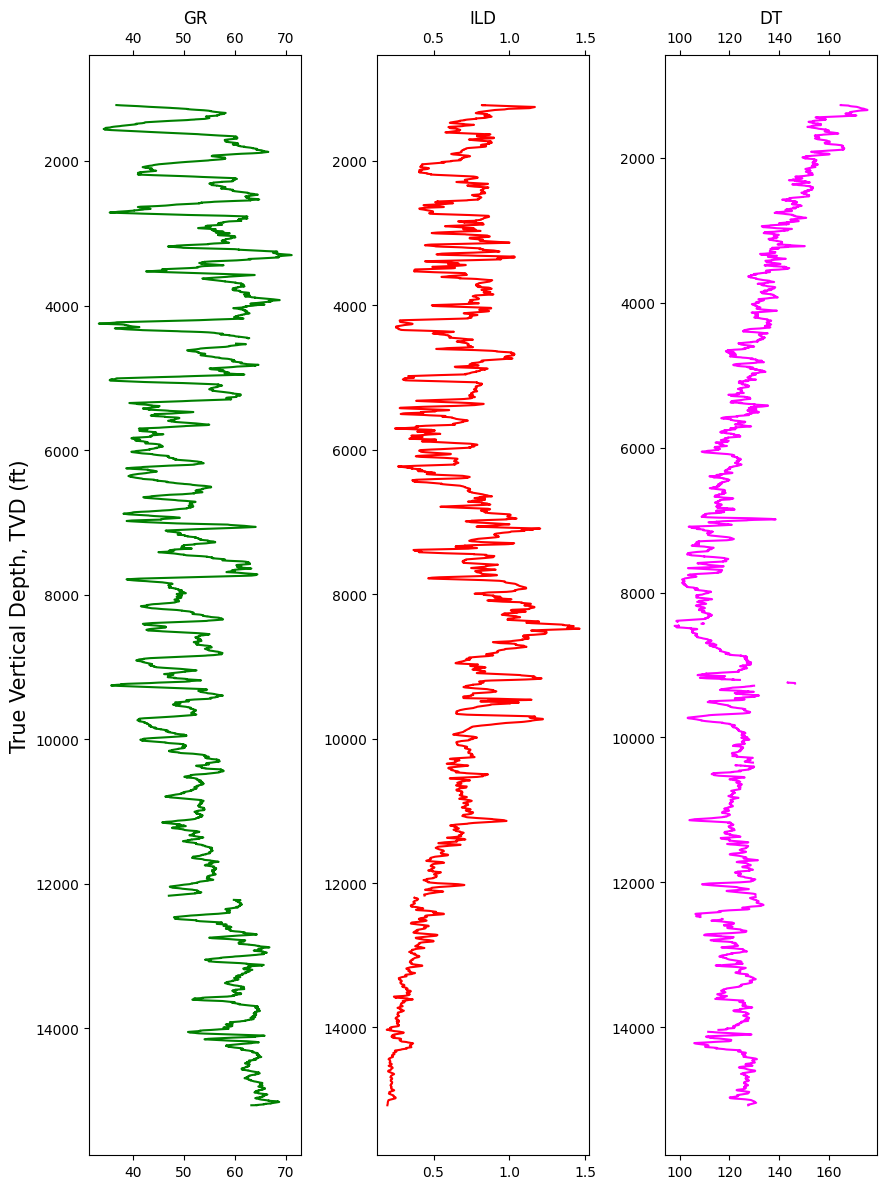

In [100]:
fig, ax  = plt.subplots(nrows=1, ncols=3, figsize=(3*3,12))

ax[0].plot(sh_extended['GR_filtered'], sh_extended['TVD'], c = 'g')
ax[0].set_title('GR')

ax[1].plot(sh_extended['ILD_filtered'], sh_extended['TVD'], c = 'r')
ax[1].set_title('ILD')

ax[2].plot(sh_extended['DT_filtered'], sh_extended['TVD'], c = 'magenta')
ax[2].set_title('DT')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

ax[0].set_ylabel('True Vertical Depth, TVD (ft)', fontsize=15)

ax[0].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)
ax[1].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)
ax[2].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)


plt.tight_layout();

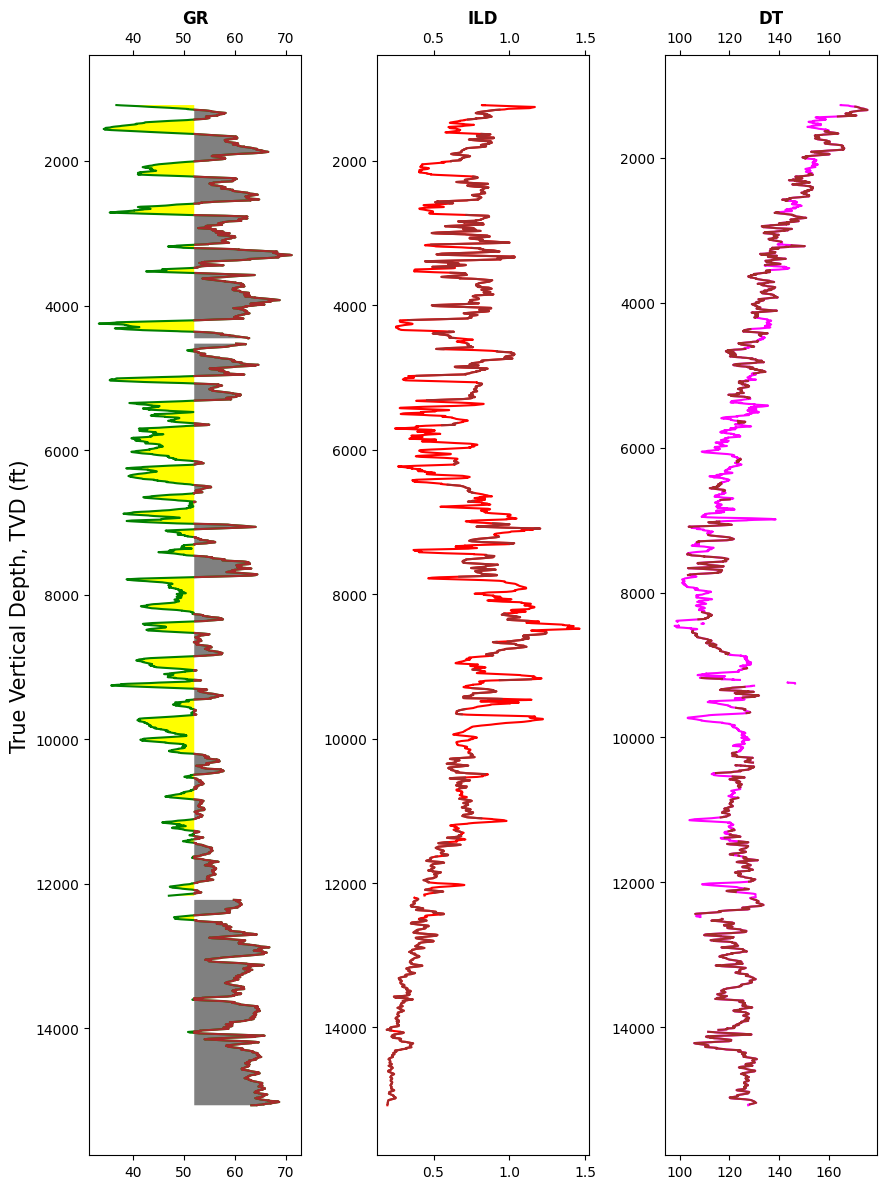

In [104]:
sh_extended['GR_mud'] = np.nan
sh_extended['ILD_mud'] = np.nan
sh_extended['DT_mud'] = np.nan

for i in range(len(sh_extended)):
  if sh_extended['GR_filtered'][i] >= 52:
    sh_extended['GR_mud'][i] = sh_extended['GR_filtered'][i]
    sh_extended['ILD_mud'][i] = sh_extended['ILD_filtered'][i]
    sh_extended['DT_mud'][i] = sh_extended['DT_filtered'][i]

  else:
    sh_extended['GR_mud'][i] = np.nan
    sh_extended['ILD_mud'][i] = np.nan
    sh_extended['DT_mud'][i] = np.nan

fig, ax  = plt.subplots(nrows=1, ncols=3, figsize=(3*3,12))

ax[0].plot(sh_extended['GR_filtered'], sh_extended['TVD'], c = 'g')
ax[0].plot(sh_extended['GR_mud'], sh_extended['TVD'], c = 'brown', label = 'Mud')

ax[1].plot(sh_extended['ILD_filtered'], sh_extended['TVD'], c = 'r')
ax[1].plot(sh_extended['ILD_mud'], sh_extended['TVD'], c = 'brown', label = 'Mud')

ax[2].plot(sh_extended['DT_filtered'], sh_extended['TVD'], c = 'magenta')
ax[2].plot(sh_extended['DT_mud'], sh_extended['TVD'], c = 'brown', label = 'Mud')

ax[0].fill_betweenx(sh_extended['TVD'], sh_extended['GR_filtered'], 52, where=(sh_extended['GR_filtered'] >= 52), facecolor='grey')
ax[0].fill_betweenx(sh_extended['TVD'], sh_extended['GR_filtered'], 52, where=(sh_extended['GR_filtered'] < 52), facecolor='yellow')


ax[0].set_title('GR', fontweight = 'bold')
ax[1].set_title('ILD', fontweight='bold')
ax[2].set_title('DT', fontweight='bold')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

ax[0].set_ylabel('True Vertical Depth, TVD (ft)', fontsize=15)

ax[0].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)
ax[1].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)
ax[2].tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)


plt.tight_layout();

In [107]:
sh_extended['Velocity'] = (1/sh_extended['DT_filtered'])*1e6
sh_extended['Velocity_mud'] = (1/sh_extended['DT_mud'])*1e6

**Now, we have the requisite data ready. Let's make a list of 'em**

1. Hydrostatic Pressure
2. Overburden stress
3. Effective stress
4. Mud-filtered sonic transit time and the corresponding computed velocity (1/dt)

# Smectite-Illite workflow

**WHAT THE FUNCTION DOES!!**
- Gnerate the NCT for smectititic mud and illitic mud
- Generate a transition function from smectite to illite
- Predict pore pressure using the Eaton's relationship

In [162]:
def smectite_illite(df, depth, velocity, overburden, hydrostatic, hydro_effective_stress, MW, top_depth_hydrostatic, bottom_depth_hydrostatic, top_depth_transition = 8000, bottom_depth_transition = 12000, Vw=5000, ill_effect=0.055):

  """
  Function to predict pore pressure using smectite-illite relationship

  INPUTS:
  Dataframe: df
  Depth: depth column (TVD preferred)
  Velocity: Velocity from wireline (preferred) or seismic data
  Overburden: overburden stress (Computed from RHOB)
  Hydrostatic: hydrostatic pressure (Equivalent to overlying column of water)
  MW: MW
  top_depth_hydrostatic: Top depth of hydrostatic pressure. This value is used as an input for computing the normal compaction trend
  bottom_depth_hydrostatic: Bottom depth of hydrostatic pressure. This value is used as an input for computing the normal compaction trend
  top_depth_transition: Top depth of transition function. This value is used as an input for computing the transition function
  bottom_depth_transition: Bottom depth of transition function. This value is used as an input for computing the transiftion function
  """

  top_depth_hydrostatic_index = np.where(depth == top_depth_hydrostatic)[0][0]
  bottom_depth_hydrostatic_index = np.where(depth == bottom_depth_hydrostatic)[0][0]

  #Using the Bower's approach for computing the NCT
  df['V_Vw'] = velocity - Vw  #Vertical axis of the NCT plot

  def bowers_nct(x, A, B):
      return A * (x ** (B))

   # Handle inf and NaN values before curve fitting
  valid_indices = np.isfinite(hydro_effective_stress[top_depth_hydrostatic_index:bottom_depth_hydrostatic_index]) & \
                    np.isfinite(df['V_Vw'][top_depth_hydrostatic_index:bottom_depth_hydrostatic_index])

  # THE HYDROSTATIC EFFECTIVE STRESS IS THE HORIZONTAL AXIS FOR THE NCT
  popt, pcov = curve_fit(bowers_nct, hydro_effective_stress[top_depth_hydrostatic_index:bottom_depth_hydrostatic_index][valid_indices], df['V_Vw'][top_depth_hydrostatic_index:bottom_depth_hydrostatic_index][valid_indices])

  df['Vh_Bowers_smec'] = Vw + bowers_nct(hydro_effective_stress, *popt) #Compute the velocity using the eq. fit
  df['DT_Bowers_smec'] = 1e6 / df['Vh_Bowers_smec']

  def smec_ill_transition(depth, top_depth_transition, bottom_depth_transition):
      result = np.zeros_like(depth)  # Initialize an array to store the results

      mask1 = depth < top_depth_transition
      mask2 = depth > bottom_depth_transition

      result[mask1] = 0
      result[mask2] = 1

      mask3 = (~mask1) & (~mask2)
      result[mask3] = (depth[mask3] - top_depth_transition) / (bottom_depth_transition - top_depth_transition)

      return result

  df['Transition_values'] = smec_ill_transition(depth, top_depth_transition, bottom_depth_transition)

  @interact(ill_effect=FloatSlider(min=0.0, max=0.5, step=0.0005, value=0.09, description='Ill Effect'))
  def plot_pressure(ill_effect):
      df['Vh_Bowers_Ill'] = [5000 + (popt[0] * sigma_v ** (popt[1] + ill_effect)) for sigma_v in hydro_effective_stress] #The value of illite can be varied via the interactive dashboard
      df['DT_Bowers_Ill'] = 1e6 / df['Vh_Bowers_Ill']

      df['DT_transition'] = ((1 - df['Transition_values']) * df['DT_Bowers_smec']) + (df['Transition_values'] * df['DT_Bowers_Ill'])
      df['Vh_Transition'] = 1e6 / df['DT_transition']

      df['pp_transition'] = overburden - (hydro_effective_stress * ((velocity / df['Vh_Transition']) ** 3))


      fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6*3, 5))

      scatter = ax[0].scatter(hydro_effective_stress, df['V_Vw'], c=depth, cmap='viridis', label='Velocity-Effective_stress')
      ax[0].plot(hydro_effective_stress, bowers_nct(hydro_effective_stress, *popt), label='Smectite fit', linewidth=3, c='r')
      ax[0].plot(hydro_effective_stress, [(popt[0] * sigma_v ** (popt[1] + ill_effect)) for sigma_v in hydro_effective_stress], label='Illite fit', linewidth=3, linestyle = '--', c  = 'b')
      ax[0].plot(hydro_effective_stress, df['Vh_Transition']-5000, label='Transition fit', linewidth=3, linestyle = '--', c  = 'k')

      ax[0].set_xlabel('Eff. stress (psi)', fontweight='bold', fontsize=13)
      ax[0].set_ylabel('V-Vw (ft/s)', fontweight='bold', fontsize=13)

      cbar = fig.colorbar(scatter, ax=ax[0], label='Depth')
      ax[0].legend()
      ax[0].set_title('Normal Compaction Trend', fontweight='bold', fontsize=15)

      scatter = ax[1].scatter(depth, df['Transition_values'], c=depth, cmap='viridis', linewidth=3)
      cbar = fig.colorbar(scatter, ax=ax[1], label='TVD (ft)')

      ax[1].set_xlabel('True Vertical Depth, TVD', fontweight='bold', fontsize=13)
      ax[1].set_ylabel('Transition values', fontweight='bold', fontsize=13)
      ax[1].set_title('Transition function', fontweight='bold', fontsize=15)

      ax[2].plot(df['pp_transition'], depth, c='r', linewidth=3, label='Predicted Pore Pressure')
      ax[2].plot(hydrostatic, depth, c='lightblue', linewidth=3, label='Hydrostatic Pore Pressure')
      ax[2].plot(overburden, depth, c='k', linewidth=3, label='Overburden Stress')
      ax[2].plot(MW, depth, c='b', linewidth=3, label='Equivalent Mud weight')

      ax[2].invert_yaxis()
      ax[2].legend()

      ax[2].set_xlabel('Pressure, Stress (psi)', fontsize=13, fontweight='bold')
      ax[2].set_ylabel('Depth (Ft)', fontsize=13, fontweight='bold')
      ax[2].set_title('Pressure plot', fontweight='bold', fontsize=15)

      plt.tight_layout()
      plt.show();

  return df, print(f' The optimal value of A for Smectite: {popt[0]} \n The optimal value of B for Smectite: {popt[1]} \n The optimal value of A for Illite: {popt[0]} \n The optimal value of B for Illite: {popt[1] + ill_effect}')


In [112]:
sh2.shape, sh_extended.shape

((40001, 16), (30181, 29))

In [134]:
# Extract the mud weight from sh2 dataframe
sh_extended['MW'] = sh2['MW'][:30181]

#Convert MW from PPG to psi
sh_extended['MW_psi'] = sh_extended['MW']*sh_extended['TVD']*0.052

In [135]:
#Create a new dataframe that consists the requisite data for the smectite-illite function
cols_smec_ill = ['TVD', 'Velocity_mud','overburden','hydrostatic','eff_stress','MW_psi']
sh_smec_ill_df = sh_extended[cols_smec_ill]

In [163]:
result_smec_ill = smectite_illite(sh_smec_ill_df, sh_smec_ill_df['TVD'], sh_smec_ill_df['Velocity_mud'], sh_smec_ill_df['overburden'], sh_smec_ill_df['hydrostatic'], sh_smec_ill_df['eff_stress'], sh_smec_ill_df['MW_psi'], 2000, 7000)

interactive(children=(FloatSlider(value=0.09, description='Ill Effect', max=0.5, step=0.0005), Output()), _dom…

 The optimal value of A for Smectite: 35.14716200520637 
 The optimal value of B for Smectite: 0.5834557818811451 
 The optimal value of A for Illite: 35.14716200520637 
 The optimal value of B for Illite: 0.6384557818811452


In [152]:
# To access/extract the dataframe containing the computed pore pressure
result_smec_ill[0]

,TVD,Velocity_mud,overburden,hydrostatic,eff_stress,MW_psi,V_Vw,Vh_Bowers_smec,DT_Bowers_smec,Transition_values,Vh_Bowers_Ill,DT_Bowers_Ill,DT_transition,Vh_Transition,pp_transition
0,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,0.500000,NaN,NaN,NaN,NaN,0.223600,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1.000000,NaN,NaN,NaN,NaN,0.447200,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1.500000,NaN,NaN,NaN,NaN,0.670800,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2.000000,NaN,NaN,NaN,NaN,0.894400,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30176,15078.427895,NaN,14214.553887,7011.468971,7203.084916,13956.592860,NaN,11260.106994,88.809103,1.0,18923.820762,52.843451,52.843451,18923.820762,NaN
30177,15078.927459,NaN,14215.058353,7011.701268,7203.357084,13957.055256,NaN,11260.245002,88.808014,1.0,18924.175072,52.842462,52.842462,18924.175072,NaN
30178,15079.427023,NaN,14215.560576,7011.933566,7203.627010,13957.517652,NaN,11260.381871,88.806935,1.0,18924.526459,52.841481,52.841481,18924.526459,NaN
30179,15079.926587,NaN,14216.059702,7012.165863,7203.893839,13957.980049,NaN,11260.517168,88.805868,1.0,18924.873810,52.840511,52.840511,18924.873810,NaN


# THANK YOU FOR FOLLOWING TILL THE END OF THE NOTEBOOK

- Please leave comments for any suggested modifications/improvements via tagbaje04@gmail.com